# Project Overview

The goal of this project is to segment customers for TravelTide, an e-booking travel startup, to support the development of a personalized rewards program.

**Project Recap**

1. **Exploratory Data Analysis (EDA)**
 * Examined booking and session data to understand customer behavior.
 * Identified key patterns in travel type (hotel vs. flight), booking frequency, and average spend.

2. **Data Cleaning**
 * Handled missing values and outliers in variables such as `session_duration`.
 * Handled anomalies in de variables `rooms` and `nights`.

3. **Cohort Selection**
 * Included sessions older than 2023-01-04.
 * Included users with more than 6 sessions.

3. **Feature Engineering**
 * `age` and `age_group`
 * `engagement_level`
 * `spending_type`
 * `dream_traveler`
 * `travel_frequency`
 * `avg_days_between_booking`
 * `trip_type`
 * `trip_frequency_score`
 * `days_since_signup`
 * `sessions_per_week`
 * `avg_session_duration`
 * `pct_sessions_flight_discount_used` and `pct_sessions_hotel_discount_used`
 * `pct_sessions_flight_booked` and `pct_sessions_hotel_booked`
 * `cancel_rate`
 * `avg_days_between_trips`
 * `total_distance` and `avg_distance`
 * `total_price_paid` and `avg_price_paid`
 * `departure_flights`, `return_flights`, `total_flights`, and `pct_return_flights_booked`
 * `total_flight_cost`, `avg_flight_costs`, `avg_fligth_cost_before_discount`, and `avg_flight_discount`
 * `unique_cities_visited`
 * `total_hotel_cost`, `avg_hotel_cost`, `avg_hotel_spend_per_night`, `avg_hotel_cost_before_discount`, and `avg_hotel_disocunt`
 * `avg_checked_bags_per_trip`
 * `avg_nights_per_stay`
 * `avg_rooms_per_booking`


**Notebook Overview**

This notebook focuses on understanding the selected cohort and the newly created features.



# Key Insights

**User Base and Engagement**

* The data has 5,242 total users who have generated 43,019 sessions and 25,304 flights across 14,895 trips
* Average session duration is about 186 seconds (3 minutes), with users making approximately 147 page clicks per session
* Most users show medium engagement levels, with few demonstrating high engagement

**Travel Patterns**

* The average travel distance is 2,224 miles, with an average price paid of $1,244
* Most users are occasional travelers, and very few are frequent travelers
* Business trips are the most common trip type (about 2,200), followed by solo/group trips (about 1,300)
* The typical stay is 3-5 nights, with the distribution skewing toward shorter stays

**Booking Behavior**

* Flight booking rate is approximately 32%, and hotel booking rate is about 33%
* Low cancellation rates overall, with most users having a cancellation rate * under 10%
* Users typically visit 2-3 unique cities, with very few visiting more than 5 cities

**Demographics**

* Female users significantly outnumber male users (roughly 4,500 vs. 600)
* Age distribution is concentrated in the 30-44 (highest) and 45-59 age brackets
* Marital status is roughly balanced (slightly more unmarried users)
* Most users (about 3,500) are not parents, with parents making up about 1,700 users
* Users predominantly come from the USA, with a smaller segment from Canada
* New York is by far the most common home city, followed by Los Angeles, Toronto, and Chicago

**Correlation Analysis**

* There's a clear positive correlation between the number of page clicks and session duration, suggesting that users who spend more time on the platform naturally interact with more pages
* Users make approximately one click every 2-3 seconds of session time
* There appears to be a positive correlation between flight and hotel bookings, suggesting that many customers who book flights also tend to book hotels
* The highest prices aren't necessarily associated with the longest distances.
* The price spread is widest at shorter distances and tends to narrow as distance increases
* Notable positive correlations exist between:

 * `Trip frequency` and `booking patterns`
 * `Total flights` and `return flights`
 * `Average price metrics` and `total cost metrics`
 * `Session engagement metrics` (duration, clicks)

* Negative correlations (blue areas) appear between:

 * `Days since signup` and `booking frequency`
 * `Some discount metrics` and `full-price purchases`

* The heatmap reveals several customer segments through correlation patterns:

   1. Frequent travelers show strong correlations between trip frequency, total distance, and booking patterns
   2. Price-sensitive customers show relationships between discount usage and booking behavior
   3. Engagement patterns on the platform correlate with conversion rates (sessions to bookings)

# Libraries and Data

We begin by loading the cleaned cohort dataset and checking for its shape, column names, missing values, and data types to ensure readiness for analysis.

* The data has 54 features
* The data includes a total of 43019 sessions, 25304 flights, and 14895 trips
* There is an average of 11 days between bookings
* Users have an average of 8 sessions with 147 page clicks
* Users have visited an average of 2 unique cities
* Users stay an average of 4 nights in 1 room
* There are missing values in columns:
 * `sessions_per_week`
 * `first_trip_date`
 * `last_trip_date`


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
cohort = pd.read_csv('/content/traveltide_cleaned_cohort_selection.csv')

In [ ]:
print('Rows and Columns:', cohort.shape)

Rows and Columns: (5242, 54)


In [ ]:
# Create summary statistics
def summarize_metrics(dataframe):
    return {
        'total_users': cohort['user_id'].nunique(),
        'total_sessions': cohort['total_sessions'].sum(),
        'total_flights': cohort['total_flights'].sum(),
        'total_trips': cohort['total_trips'].sum(),
        'avg_session_duration': cohort['avg_session_duration'].mean(),
        'avg_page_clicks': cohort['total_page_clicks'].mean(),
        'avg_distance': cohort['avg_distance'].mean(),
        'avg_price_paid': cohort['avg_price_paid'].mean(),
        'avg_pct_flight_booked': cohort['pct_sessions_flight_booked'].mean(),
        'avg_pct_hotel_booked': cohort['pct_sessions_hotel_booked'].mean()
    }

cohort_summary = summarize_metrics(cohort)
summary_df = pd.DataFrame(cohort_summary, index=['summary']).T

# Display the summary table
print('Cohort Summary:')
display(summary_df.style.format("{:.2f}"))

Cohort Summary:


,summary
total_users,5242.00
total_sessions,43019.00
total_flights,25304.00
total_trips,14895.00
avg_session_duration,185.66
avg_page_clicks,147.09
avg_distance,2224.01
avg_price_paid,1244.43
avg_pct_flight_booked,31.64
avg_pct_hotel_booked,33.07


In [ ]:
cohort.head()

,user_id,age,age_group,engagement_level,spending_type,dream_traveler,travel_frequency,avg_days_between_booking,trip_type,trip_frequency_score,...,avg_flight_discount,unique_cities_visited,total_hotel_cost,avg_hotel_cost,avg_hotel_cost_before_discount,avg_hotel_disocunt,avg_checked_bags_per_trip,avg_nights_per_stay,avg_rooms_per_booking,avg_hotel_spend_per_night
0,94883,53,45-59,medium engagement,economy traveler,traveler,occasional traveler,6.5,business trip,2,...,0.00,2,230.00,115.0,0.00,0.00,0.500000,1.000000,1.500000,76.666667
1,101486,52,45-59,medium engagement,luxury traveler,traveler,occasional traveler,7.5,family trip,2,...,0.00,1,2452.00,1226.0,0.00,0.00,0.000000,4.500000,1.500000,175.142857
2,101961,44,30-44,medium engagement,premium traveler,traveler,regular traveler,5.8,business trip,3,...,0.02,5,2798.00,559.6,0.00,0.00,0.400000,4.400000,1.000000,127.181818
3,118043,53,45-59,medium engagement,luxury traveler,traveler,regular traveler,8.2,parent trip,3,...,0.00,3,6443.45,1327.6,55.14,0.06,1.000000,6.000000,1.250000,247.825000
4,125845,41,30-44,medium engagement,economy traveler,traveler,occasional traveler,9.0,couple trip,2,...,0.05,3,864.00,288.0,0.00,0.00,0.666667,2.333333,1.333333,108.000000


In [ ]:
cohort.describe()

,user_id,age,avg_days_between_booking,trip_frequency_score,days_since_signup,home_airport_lat,home_airport_lon,total_sessions,sessions_per_week,total_page_clicks,...,avg_flight_discount,unique_cities_visited,total_hotel_cost,avg_hotel_cost,avg_hotel_cost_before_discount,avg_hotel_disocunt,avg_checked_bags_per_trip,avg_nights_per_stay,avg_rooms_per_booking,avg_hotel_spend_per_night
count,5242.000000,5242.000000,5242.000000,5242.000000,5242.000000,5242.000000,5242.000000,5242.000000,5071.000000,5242.000000,...,5242.000000,5242.000000,5242.000000,5242.000000,5242.000000,5242.000000,5242.000000,5242.000000,5242.000000,5242.000000
mean,546845.205456,43.124380,11.360461,2.124189,-15.949065,38.497792,-94.063795,8.206601,-5.089892,147.090424,...,0.017072,2.288821,2255.537352,843.011186,22.743383,0.013806,0.536535,4.240688,1.177153,171.444210
std,62616.322159,10.906997,24.301562,0.697278,33.272700,6.202164,18.039729,0.462122,12.682361,71.739229,...,0.036859,1.321070,2202.197203,900.532428,52.964531,0.028778,0.466010,2.759191,0.388531,92.228231
min,94883.000000,18.000000,1.000000,1.000000,-121.000000,21.316000,-157.927000,8.000000,-77.000000,46.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,519338.250000,37.000000,6.000000,2.000000,-31.000000,33.881000,-112.008000,8.000000,-5.730000,106.000000,...,0.000000,1.000000,805.625000,358.666667,0.000000,0.000000,0.000000,2.500000,1.000000,113.270652
50%,541510.500000,43.000000,7.000000,2.000000,-15.000000,39.297000,-89.977000,8.000000,-2.430000,130.000000,...,0.000000,2.000000,1648.000000,612.583333,0.000000,0.000000,0.500000,3.666667,1.000000,154.725175
75%,574416.500000,50.000000,8.500000,3.000000,-4.000000,42.276000,-79.370000,8.000000,-1.190000,162.750000,...,0.020000,3.000000,2964.000000,991.150000,25.987500,0.016667,1.000000,5.000000,1.333333,208.943229
max,811077.000000,86.000000,364.000000,4.000000,332.000000,61.251000,-63.499000,11.000000,70.000000,873.000000,...,0.450000,7.000000,28114.000000,14057.000000,747.900000,0.250000,5.000000,30.000000,4.000000,1063.000000


In [ ]:
cohort.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5242 entries, 0 to 5241
Data columns (total 54 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   user_id                            5242 non-null   int64  
 1   age                                5242 non-null   int64  
 2   age_group                          5242 non-null   object 
 3   engagement_level                   5242 non-null   object 
 4   spending_type                      5242 non-null   object 
 5   dream_traveler                     5242 non-null   object 
 6   travel_frequency                   5242 non-null   object 
 7   avg_days_between_booking           5242 non-null   float64
 8   trip_type                          5242 non-null   object 
 9   trip_frequency_score               5242 non-null   int64  
 10  days_since_signup                  5242 non-null   int64  
 11  gender                             5242 non-null   objec

In [ ]:
cohort.isnull().sum()

,0
user_id,0
age,0
age_group,0
engagement_level,0
spending_type,0
dream_traveler,0
travel_frequency,0
avg_days_between_booking,0
trip_type,0
trip_frequency_score,0


In [ ]:
cohort.duplicated().sum()

np.int64(0)

In [ ]:
cohort.nunique()

,0
user_id,5242
age,67
age_group,4
engagement_level,2
spending_type,4
dream_traveler,1
travel_frequency,4
avg_days_between_booking,301
trip_type,5
trip_frequency_score,4


# Univariate Data Analysis

We examine the distribution of key session features. This helps us understand the overall user interaction levels.

* `engagement_level`
*	`spending_type`
* `travel_frequency`
* `trip_type`
*	`total_sessions`
* `sessions_per_week`
* `avg_clicks_per_session`
* `cancel_rate`
* `unique_cities_visited`
* `avg_nights_per_stay`

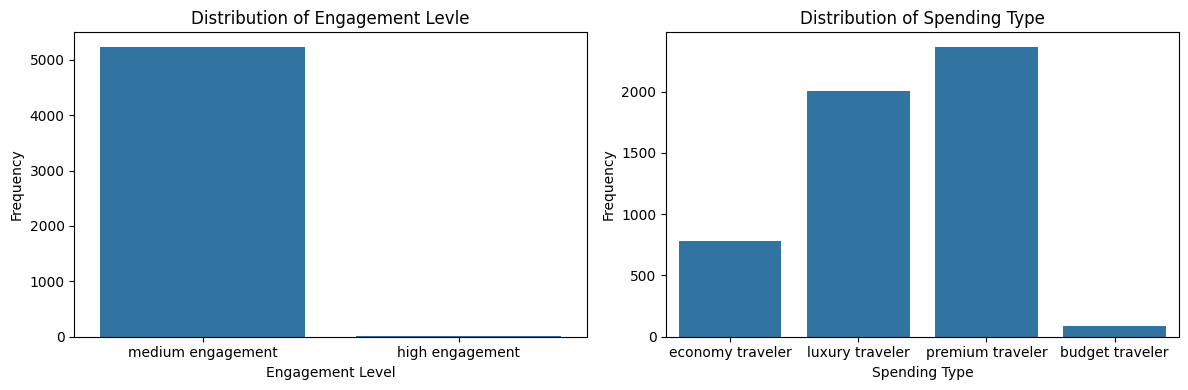

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot 1: Engagement Level
sns.countplot(x='engagement_level', data=cohort, ax=axes[0])
axes[0].set_xlabel('Engagement Level')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Engagement Levle')

# Plot 2: Spending Type
sns.countplot(x='spending_type', data=cohort, ax=axes[1])
axes[1].set_xlabel('Spending Type')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Spending Type')

# Adjust layout
plt.tight_layout()
plt.show()

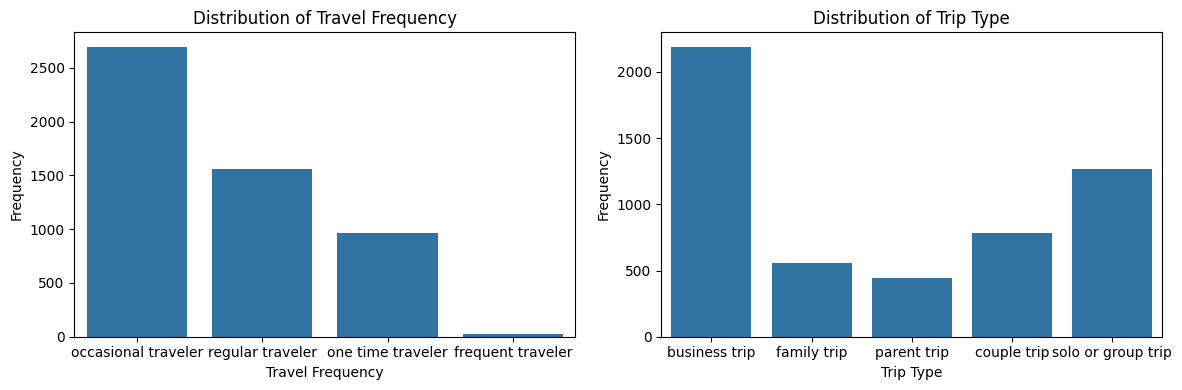

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot 1: Travel Frequency
sns.countplot(x='travel_frequency', data=cohort, ax=axes[0])
axes[0].set_xlabel('Travel Frequency')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Travel Frequency')

# Plot 2: Trip Type
sns.countplot(x='trip_type', data=cohort, ax=axes[1])
axes[1].set_xlabel('Trip Type')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Trip Type')

# Adjust layout
plt.tight_layout()
plt.show()

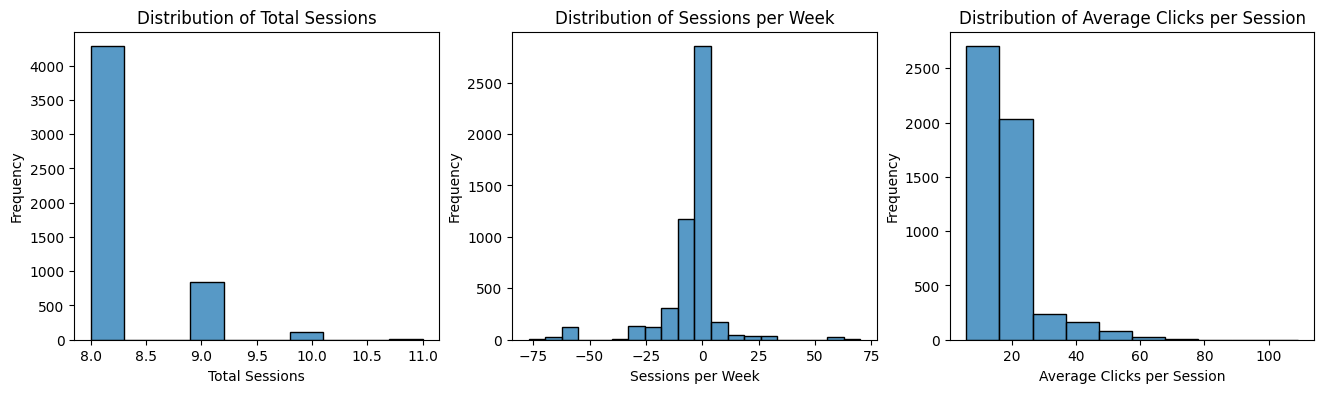

<Figure size 640x480 with 0 Axes>

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(16, 4))  # 1 row, 2 columns

# Plot 1: Total Sessions
sns.histplot(data=cohort, x='total_sessions', bins=10, edgecolor='black', ax=axes[0])
axes[0].set_xlabel('Total Sessions')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Total Sessions')

# Plot 2: Sessions per Week
sns.histplot(data=cohort, x='sessions_per_week', bins=20, edgecolor='black', ax=axes[1])
axes[1].set_xlabel('Sessions per Week')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Sessions per Week')

# Plot 3: Average Clicks per Session
sns.histplot(data=cohort, x='avg_clicks_per_session', bins=10)
axes[2].set_xlabel('Average Clicks per Session')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Distribution of Average Clicks per Session')
plt.show()

# Adjust layout
plt.tight_layout()
plt.show()

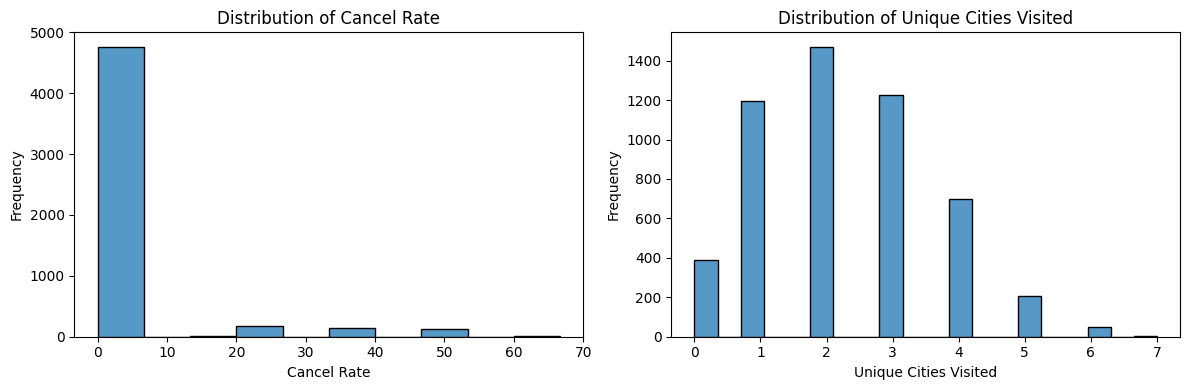

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # 1 row, 2 columns

# Plot 1: Cancel Rate
sns.histplot(data=cohort, x='cancel_rate', bins=10, edgecolor='black', ax=axes[0])
axes[0].set_xlabel('Cancel Rate')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Cancel Rate')

# Plot 2: Unique Cities Visited
sns.histplot(data=cohort, x='unique_cities_visited', bins=20, edgecolor='black', ax=axes[1])
axes[1].set_xlabel('Unique Cities Visited')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Unique Cities Visited')

# Adjust layout
plt.tight_layout()
plt.show()

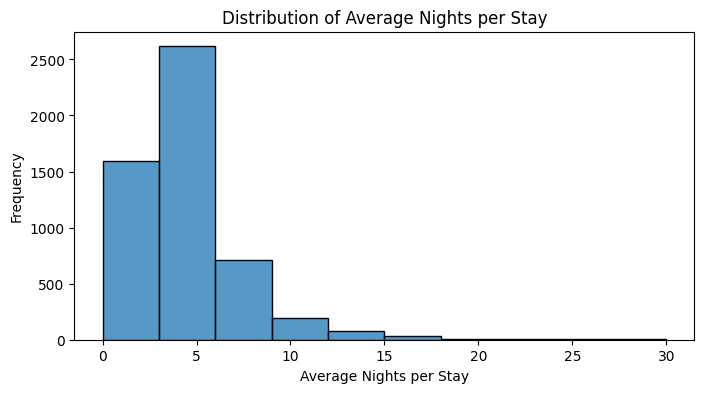

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(data=cohort, x='avg_nights_per_stay', bins=10)
plt.xlabel('Average Nights per Stay')
plt.ylabel('Frequency')
plt.title('Distribution of Average Nights per Stay')
plt.show()

# User Demographics

We check key demographics to understand the users of TravelTide.
* `gender`
* `marital status`
* `parental status`
* `home country`
* `home city`

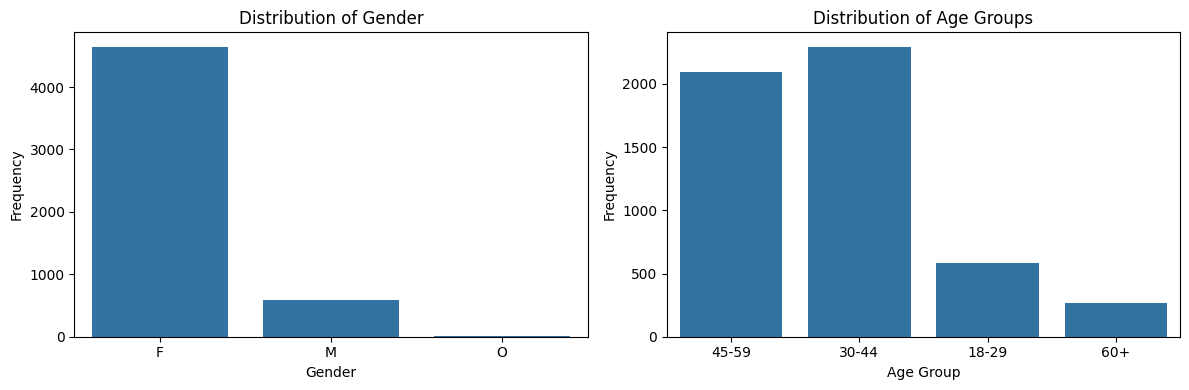

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot 1: Gender
sns.countplot(x='gender', data=cohort, ax=axes[0])
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Gender')

# Plot 2: Age Group
sns.countplot(x='age_group', data=cohort, ax=axes[1])
axes[1].set_xlabel('Age Group')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Age Groups')

# Adjust layout
plt.tight_layout()
plt.show()

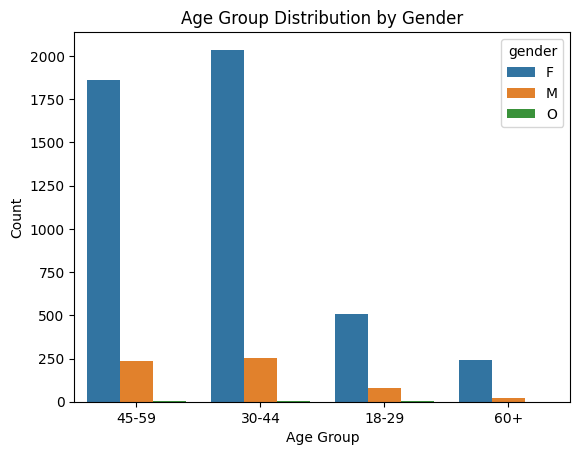

In [ ]:
sns.countplot(data=cohort, x='age_group', hue='gender')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Age Group Distribution by Gender')
plt.show()

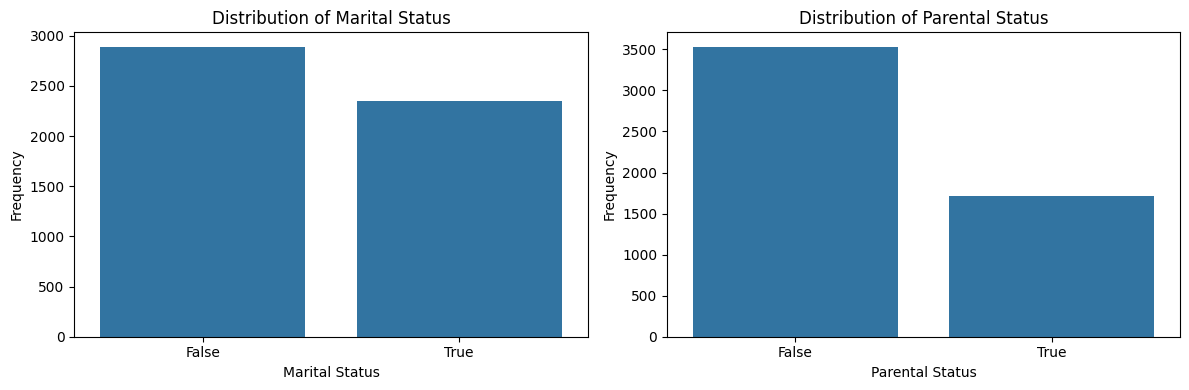

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot 1: Marital Status
sns.countplot(x='married', data=cohort, ax=axes[0])
axes[0].set_xlabel('Marital Status')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Marital Status')

# Plot 2: Parental Status
sns.countplot(x='has_children', data=cohort, ax=axes[1])
axes[1].set_xlabel('Parental Status')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Parental Status')

# Adjust layout
plt.tight_layout()
plt.show()

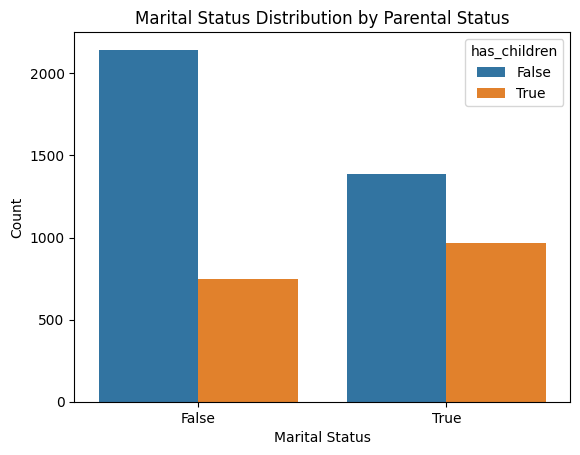

In [ ]:
sns.countplot(data=cohort, x='married', hue='has_children')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Marital Status Distribution by Parental Status')
plt.show()

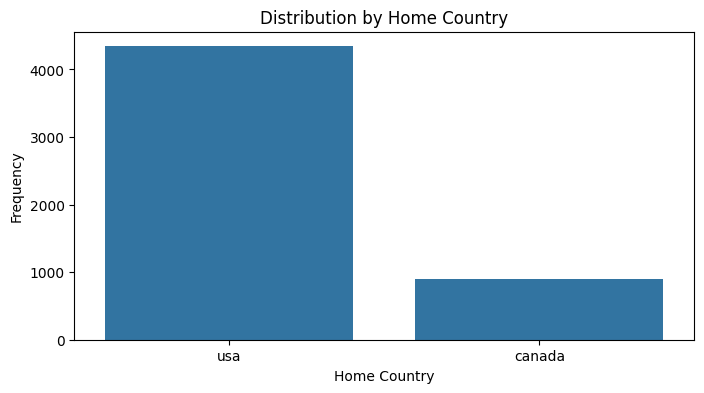

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(x='home_country', data=cohort)
plt.xlabel('Home Country')
plt.ylabel('Frequency')
plt.title('Distribution by Home Country')
plt.show()

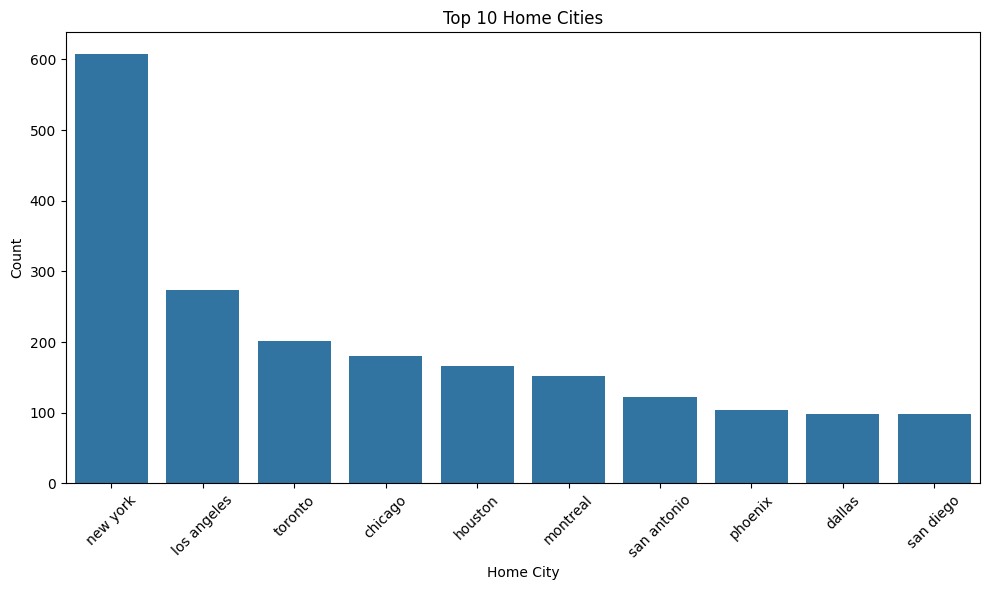

In [ ]:
# Get top 10 most frequent home cities
top_cities = cohort['home_city'].value_counts().nlargest(10).index

# Filter the DataFrame
top_sessions = cohort[cohort['home_city'].isin(top_cities)]

# Plot
plt.figure(figsize=(10, 6))
sns.countplot(data=top_sessions, x='home_city', order=top_cities)
plt.title('Top 10 Home Cities')
plt.xlabel('Home City')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Multivariate Analysis

We are looking for patterns and correlation between key features.

* `total_page_clicks` and `avg_session_duration`
* `pct_sessions_flight_booked` and `pct_sessions_hotel_booked`
* `avg_distance` and `avg_price_paid`


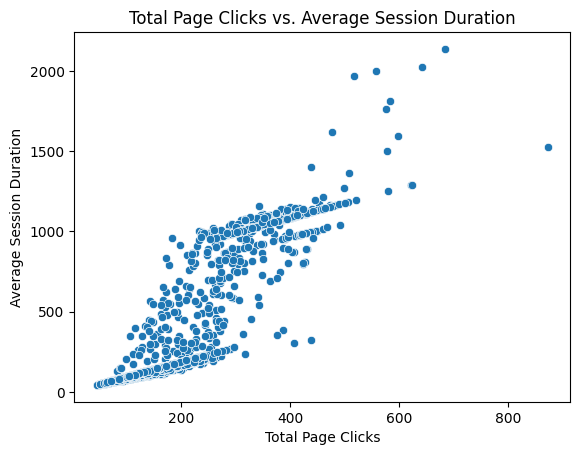

In [ ]:
sns.scatterplot(data=cohort, x='total_page_clicks', y='avg_session_duration')
plt.xlabel('Total Page Clicks')
plt.ylabel('Average Session Duration')
plt.title('Total Page Clicks vs. Average Session Duration')
plt.show()

There is a distinct group of highly engaged users in the upper-right quadrant (500+ clicks, 1500+ seconds) who spend significantly more time and interact much more extensively with the platform. These likely represent your most valuable customers or frequent travelers.

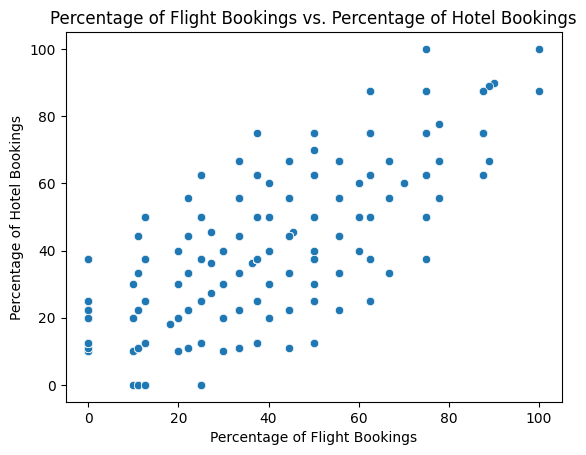

In [ ]:
sns.scatterplot(data=cohort, x='pct_sessions_flight_booked', y='pct_sessions_hotel_booked')
plt.xlabel('Percentage of Flight Bookings')
plt.ylabel('Percentage of Hotel Bookings')
plt.title('Percentage of Flight Bookings vs. Percentage of Hotel Bookings')
plt.show()

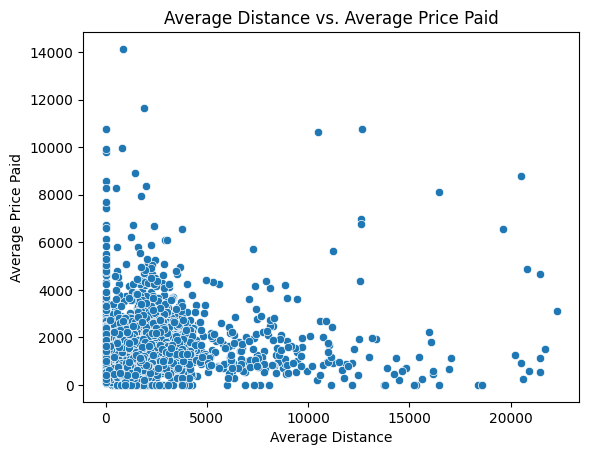

In [ ]:
sns.scatterplot(data=cohort, x='avg_distance', y='avg_price_paid')
plt.xlabel('Average Distance')
plt.ylabel('Average Price Paid')
plt.title('Average Distance vs. Average Price Paid')
plt.show()

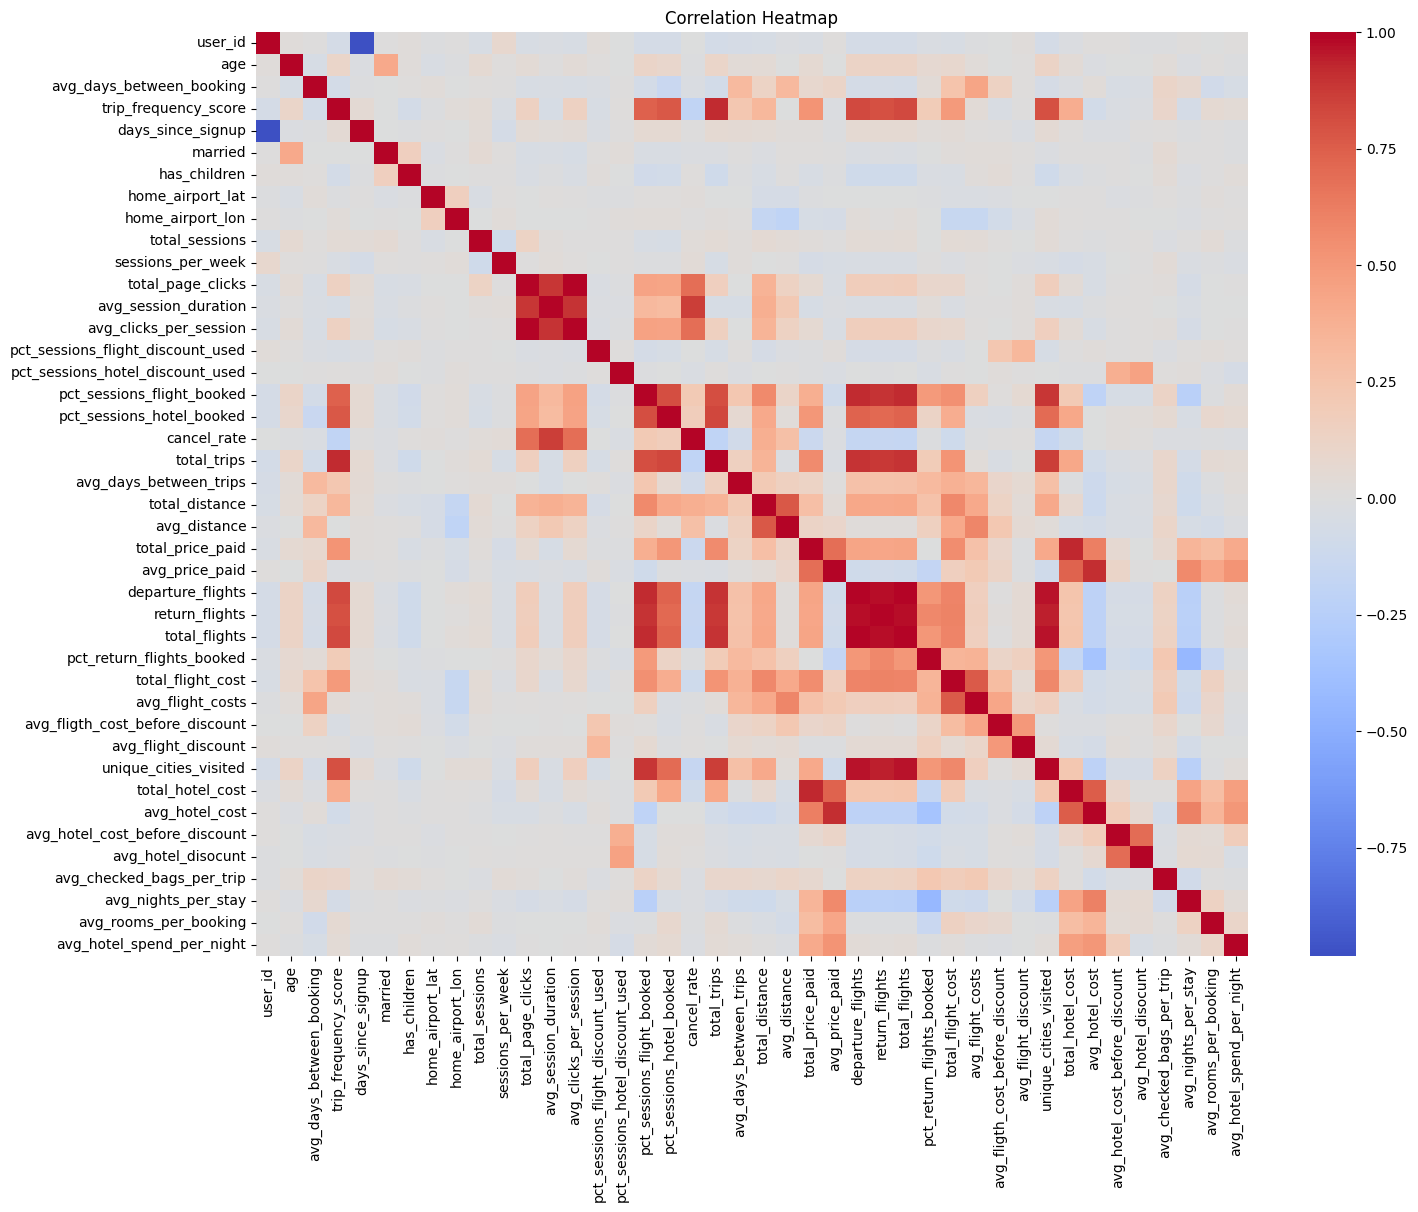

In [ ]:
plt.figure(figsize=(16, 12))
sns.heatmap(cohort.corr(numeric_only=True), annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Compute the correlation matrix
corr_matrix = cohort.corr(numeric_only=True)

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find index of feature pairs with correlation greater than 0.53
high_corr = upper.stack().reset_index()
high_corr.columns = ['Feature 1', 'Feature 2', 'Correlation']
high_corr = high_corr[high_corr['Correlation'].abs() > 0.53].sort_values(by='Correlation', ascending=False)

# Convert to Dataframe
high_corr = pd.DataFrame(high_corr)

# Display result
high_corr.value_counts()

Feature 1                       Feature 2                   Correlation
avg_clicks_per_session          cancel_rate                  0.690182      1
avg_distance                    avg_flight_costs             0.588689      1
avg_hotel_cost                  avg_nights_per_stay          0.612610      1
avg_hotel_cost_before_discount  avg_hotel_disocunt           0.693077      1
avg_price_paid                  avg_hotel_cost               0.910855      1
                                avg_nights_per_stay          0.571711      1
                                total_hotel_cost             0.731657      1
avg_session_duration            avg_clicks_per_session       0.891664      1
                                cancel_rate                  0.865538      1
departure_flights               return_flights               0.973110      1
                                total_flight_cost            0.595705      1
                                total_flights                1.000000      1
                                unique_cities_visited        0.966273      1
pct_sessions_flight_booked      departure_flights            0.916883      1
                                pct_sessions_hotel_booked    0.809621      1
                                return_flights               0.891685      1
                                total_distance               0.566606      1
                                total_flight_cost            0.541398      1
                                total_flights                0.916883      1
                                total_trips                  0.809713      1
                                unique_cities_visited        0.885564      1
pct_sessions_hotel_booked       departure_flights            0.731879      1
                                return_flights               0.706646      1
                                total_flights                0.731879      1
                                total_trips                  0.834677      1
                                unique_cities_visited        0.702220      1
return_flights                  pct_return_flights_booked    0.574641      1
                                total_flight_cost            0.598432      1
                                total_flights                0.973110      1
                                unique_cities_visited        0.939611      1
total_distance                  avg_distance                 0.768422      1
                                total_flight_cost            0.575805      1
total_flight_cost               avg_flight_costs             0.760997      1
                                unique_cities_visited        0.575756      1
total_flights                   total_flight_cost            0.595705      1
                                unique_cities_visited        0.966273      1
total_hotel_cost                avg_hotel_cost               0.759610      1
total_page_clicks               avg_clicks_per_session       0.991313      1
                                avg_session_duration         0.886191      1
                                cancel_rate                  0.688508      1
total_price_paid                avg_hotel_cost               0.613799      1
                                avg_price_paid               0.683787      1
                                total_flight_cost            0.555934      1
                                total_hotel_cost             0.926015      1
total_trips                     departure_flights            0.898492      1
                                return_flights               0.876847      1
                                total_flights                0.898492      1
                                total_price_paid             0.559594      1
                                unique_cities_visited        0.864718      1
trip_frequency_score            departure_flights            0.826453      1
                                pct_sessions_flight_booked   0.744318      1
 